In [1]:
!pip install pyspark


In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master("local[*]") \
    .appName("EcommerceSalesMapReduce") \
    .getOrCreate()

spark


In [3]:
import pandas as pd

data = {
    "Order_ID": [1,2,3,4,5,6,7,8],
    "Product": ["Mobile","Laptop","Headphones","Mobile",
                "Shoes","Laptop","Shoes","Mobile"],
    "Price": [15000, 55000, 2000, 16000, 3000, 60000, 3200, 17000],
    "Quantity": [1,1,2,1,2,1,1,1]
}

df = pd.DataFrame(data)
df.to_csv("ecommerce_sales.csv", index=False)
df


,Order_ID,Product,Price,Quantity
0,1,Mobile,15000,1
1,2,Laptop,55000,1
2,3,Headphones,2000,2
3,4,Mobile,16000,1
4,5,Shoes,3000,2
5,6,Laptop,60000,1
6,7,Shoes,3200,1
7,8,Mobile,17000,1


from matplotlib import pyplot as plt
df['Order_ID'].plot(kind='hist', bins=20, title='Order_ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Price'].plot(kind='hist', bins=20, title='Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Quantity'].plot(kind='hist', bins=20, title='Quantity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Product').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Order_ID', y='Price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Price', y='Quantity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Order_ID']
  ys = series['Price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Order_ID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Product')):
  _plot_series(series, series_name, i)
  fig.legend(title='Product', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Order_ID')
_ = plt.ylabel('Price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Order_ID']
  ys = series['Quantity']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Order_ID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Product')):
  _plot_series(series, series_name, i)
  fig.legend(title='Product', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Order_ID')
_ = plt.ylabel('Quantity')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Order_ID']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Order_ID'}, axis=1)
              .sort_values('Order_ID', ascending=True))
  xs = counted['Order_ID']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Order_ID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Product')):
  _plot_series(series, series_name, i)
  fig.legend(title='Product', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Order_ID')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df['Order_ID'].plot(kind='line', figsize=(8, 4), title='Order_ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Price'].plot(kind='line', figsize=(8, 4), title='Price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Quantity'].plot(kind='line', figsize=(8, 4), title='Quantity')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Product'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Order_ID', y='Product', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Product'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Price', y='Product', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Product'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Quantity', y='Product', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [4]:
sales_df = spark.read.csv(
    "ecommerce_sales.csv",
    header=True,
    inferSchema=True
)

sales_df.show()


+--------+----------+-----+--------+
|Order_ID|   Product|Price|Quantity|
+--------+----------+-----+--------+
|       1|    Mobile|15000|       1|
|       2|    Laptop|55000|       1|
|       3|Headphones| 2000|       2|
|       4|    Mobile|16000|       1|
|       5|     Shoes| 3000|       2|
|       6|    Laptop|60000|       1|
|       7|     Shoes| 3200|       1|
|       8|    Mobile|17000|       1|
+--------+----------+-----+--------+



In [5]:
rdd = sales_df.rdd


In [7]:
mapped = rdd.map(
    lambda row: (row.Product, row.Price * row.Quantity)
)


In [8]:
reduced = mapped.reduceByKey(lambda a, b: a + b)
sales_result = reduced.collect()
sales_result


[('Mobile', 48000), ('Laptop', 115000), ('Headphones', 4000), ('Shoes', 9200)]

In [9]:
prediction = reduced.map(
    lambda x: ("High Demand", 1) if x[1] >= 50000 else ("Low Demand", 1)
)

prediction_result = prediction.reduceByKey(lambda a, b: a + b).collect()
prediction_result


[('Low Demand', 3), ('High Demand', 1)]

In [10]:
prediction_df = spark.createDataFrame(
    prediction_result,
    ["Sales_Category", "Product_Count"]
)

prediction_df.show()


+--------------+-------------+
|Sales_Category|Product_Count|
+--------------+-------------+
|    Low Demand|            3|
|   High Demand|            1|
+--------------+-------------+



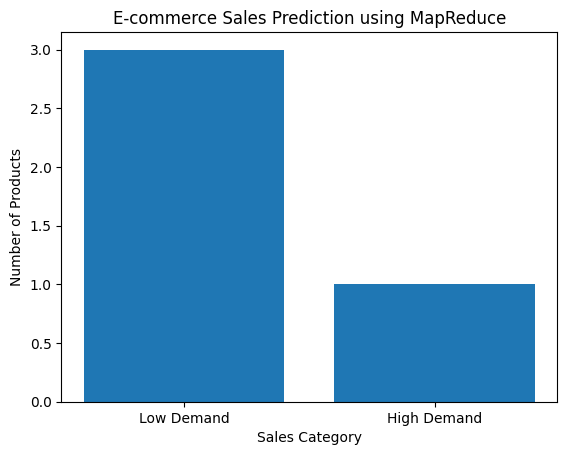

In [11]:
import matplotlib.pyplot as plt

category = [x[0] for x in prediction_result]
count = [x[1] for x in prediction_result]

plt.figure()
plt.bar(category, count)
plt.xlabel("Sales Category")
plt.ylabel("Number of Products")
plt.title("E-commerce Sales Prediction using MapReduce")
plt.show()


In [12]:
spark.stop()

